In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#constants and intial positions
ms = 1e7 #1e7
mp = 1e4 #jupiter
ma = 1
G = 1 #gravitational constant
R = 20

xs = 0 #position of sun at x=0
xp = R #position of jupiter at x=20
# R = np.abs(rs-rp)

rs = np.array([xs,0])
rp = np.array([xp,0])
# print(rs,rp)

rcm = (rp*mp+rs*ms)/(mp+ms)

rs = rs-rcm
rp = rp-rcm

theta = np.radians(70)

xa = R * np.cos(theta)
ya = R * np.sin(theta)
ra = np.array([xa,ya])

# print(xa, ya)

In [3]:
mu = ms * mp / (ms + mp)
omega = np.sqrt((G*ms*mp)/ (R**3 * mu))


In [4]:
vs = omega * rs[::-1]
vp = omega * rp[::-1]
va = np.array([-omega*ra[0], omega*ra[1]])
print(vs, vp, va)


[ 0.         -0.70675349] [  0.         706.75349274] [-241.96565481  664.79517288]


In [5]:
ys = np.concatenate([rs,vs]) #y of star
yp = np.concatenate([rp,vp]) #planet
ya = np.concatenate([ra,va]) #asteroid

y = np.concatenate([ys, yp, ya])
print(y)

[-1.99800200e-02  0.00000000e+00  0.00000000e+00 -7.06753493e-01
  1.99800200e+01  0.00000000e+00  0.00000000e+00  7.06753493e+02
  6.84040287e+00  1.87938524e+01 -2.41965655e+02  6.64795173e+02]


In [6]:
def KeplerODE(t,y): 
    global mp,ms,G 
 
    rs = y[0:2] 
    vs = y[2:4] 
    rp = y[4:6]
    vp = y[6:8]
    ra = y[8:10]
    va = y[10:12]
    
    
    r_sp = np.sqrt((rs[0]-rp[0])**2 + (rs[1]-rp[1])**2)  #(xs-xp)**2 + (ys-yp)**2 
    r_sa = np.sqrt((rs[0]-ra[0])**2 + (rs[1]-ra[1])**2)
    r_pa = np.sqrt((rp[0]-ra[0])**2 + (rp[1]-ra[1])**2)
    
#######SUN
    
    F_sp = (-G * ms * mp) / (r_sp**3) * (rs-rp)
    F_sa = (-G* ms * ma) / (r_sa**3) * (rs-ra)
    
    a_s = (F_sp + F_sa) / ms 
    
    drdt_S = vs
    dvdt_S = a_s
    dydt_S = np.concatenate((drdt_S,dvdt_S))
    
#######Planet
    
    F_ps = (-G * ms * mp) / (r_sp**3) * (rp-rs)
    F_pa = (-G* mp * ma) / (r_pa**3) * (rp-ra)
   
    a_p = (F_ps - F_pa) / mp 
    
    drdt_P = vp
    dvdt_P = a_p
    dydt_P = np.concatenate((drdt_P,dvdt_P))
    
#######Asteroid
 
    F_sa = (-G * ms * ma) / (r_sa**3) * (ra-rs)
    F_pa = (-G* mp * ma) / (r_pa**3) * (ra-rp)
    
    a_a = (F_sa + F_pa) / ma 
    
    drdt_A = va
    dvdt_A = a_a
    dydt_A = np.concatenate((drdt_A,dvdt_A))
    
    dydt = np.concatenate((dydt_S,dydt_P,dydt_A))
    
#     return np.concatenate((drdt,dvdt))  
    return dydt
 

## Part 4

In [7]:
y = np.copy(y)
t = 0
n = 1000
P = np.sqrt((4*np.pi**2) * R**3 / (G * (ms + mp)))
dt = P / n

sun_xt = np.array(y[0])
sun_yt = np.array(y[1])
planet_xt = np.array(y[4])
planet_yt = np.array(y[5])
asteroid_xt = np.array(y[8])
asteroid_yt = np.array(y[9])

for step in range(0,int(n/4)):
    F1 = KeplerODE(step,y)
    
    y2 = y + (dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y + (dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y + (dt)*F3
    F4 = KeplerODE(step,y4)
    
    y = y + (dt/6)  * (4*F1 + .5*F2 + .5*F3 + F4)
    
    
    sun_xt = np.append(sun_xt,y[0])
    sun_yt = np.append(sun_yt,y[1])
    planet_xt = np.append(planet_xt,y[4])
    planet_yt = np.append(planet_yt,y[5])
    asteroid_xt = np.append(asteroid_xt,y[8])
    asteroid_yt = np.append(asteroid_yt,y[9])
    
    
    F_1 = KeplerODE(step,y)
    
    y_2 = y + (dt/2)*F1
    F_2 = KeplerODE(step,y_2)
    
    y_3 = y + (dt/2)*F_2
    F_3 = KeplerODE(step,y_3)
    
    y_4 = y + (dt)*F_3
    F_4 = KeplerODE(step,y_4)
    
    y = y + (dt/6)  * (F_1 + F_2 + F_3 + F_4)
    
    
    sun_x = np.append(sun_xt,y[0])
    sun_y = np.append(sun_yt,y[1])
    planet_x = np.append(planet_xt,y[6])
    planet_y = np.append(planet_yt,y[5])
    asteroid_x = np.append(asteroid_xt,y[8])
    asteroid_y = np.append(asteroid_yt,y[9])



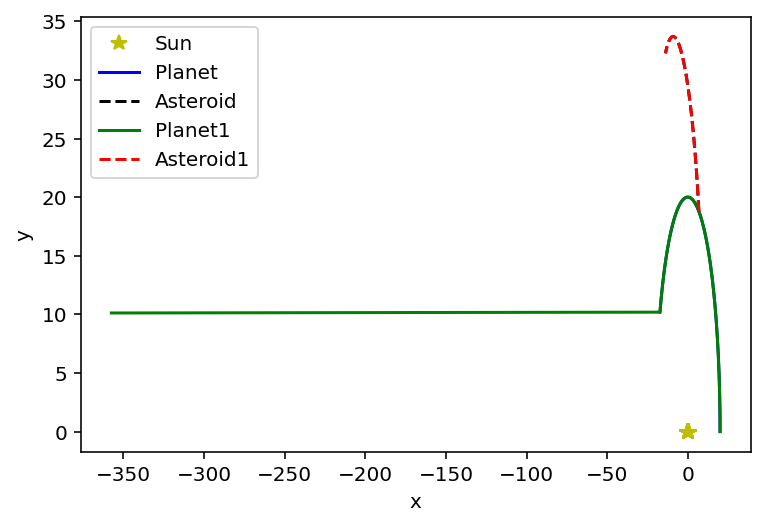

In [8]:
plt.plot(sun_xt,sun_yt,'y*', ms = 8, label = 'Sun')
plt.plot(planet_xt,planet_yt,color= 'blue', ms = 8, label = 'Planet')
plt.plot(asteroid_xt,asteroid_yt,'k--', ms = 8, label = 'Asteroid')


plt.plot(planet_x,planet_y,color= 'green', ms = 8, label = 'Planet1')
plt.plot(asteroid_x,asteroid_y,'r--', ms = 8, label = 'Asteroid1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()


# Part 5

In [9]:
y = np.copy(y)
n = 1000

asteroid_xcoords, asteroid_ycoords = np.array((y[9],y[8]))
asteroid_xcoord, asteroid_ycoord = np.array((y[7],y[8]))
transform = np.zeros((2,2))


for step in range(0,int(10*(n/.5))):
    
    xp,yp = (y[4],y[5])
    ra = (y[8],y[7])
    
    theta = np.arctan2(yp,xp)
    
    transform[0,:] = [np.cos(theta), np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    ra_prime = transform@ra
    
    asteroid_xcoords = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoords = np.append(asteroid_ycoords,ra_prime[1])
    
    
    F1 = KeplerODE(step,y)
    
    y2 = y + (dt/2)*F1
    F2 = KeplerODE(step,y2)
    
    y3 = y + (dt/2)*F2
    F3 = KeplerODE(step,y3)
    
    y4 = y + (dt)*F3
    F4 = KeplerODE(step,y4)
    
#     y = y + (dt/6)  * (4*F1 + .5*F2 + .5*F3 + F4)
    y = y + (dt/6)  * (4*F1 + 5*F2 + 7*F3 + 4*F4)
    
    
    sun_xt = np.append(sun_xt,y[0])
    sun_yt = np.append(sun_yt,y[1])
    planet_xt = np.append(planet_xt,y[4])
    planet_yt = np.append(planet_yt,y[5])
    asteroid_xt = np.append(asteroid_xt,y[8])
    asteroid_yt = np.append(asteroid_yt,y[9])
#==================================================

    xt,yt = (y[5],y[4])
    rt = (y[6],y[7])
    
    theta = np.arctan2(yt,xt)
    
    transform[0,:] = [np.cos(theta), np.sin(theta)]
    transform[1,:] = [-np.sin(theta),np.cos(theta)]
    ra_prime = transform@ra
    
    asteroid_xcoord = np.append(asteroid_xcoords,ra_prime[0])
    asteroid_ycoord = np.append(asteroid_ycoords,ra_prime[1])
    
    
    F_1 = KeplerODE(step,y)
    
    y_2 = y + (dt/2)*F1
    F_2 = KeplerODE(step,y_2)
    
    y_3 = y + (dt/2)*F_2
    F_3 = KeplerODE(step,y_3)
    
    y_4 = y + (dt)*F_3
    F_4 = KeplerODE(step,y_4)
    
#     y = y + (dt/6)  * (4*F1 + .5*F2 + .5*F3 + F4)
    y = y + (dt/6)  * (F_1 + F_2 + F_3 + F_4)
    
    
    sun_x = np.append(sun_xt,y[0])
    sun_t = np.append(sun_yt,y[1])
    planet_x = np.append(planet_xt,y[4])
    planet_y = np.append(planet_yt,y[5])
    asteroid_x = np.append(asteroid_xt,y[8])
    asteroid_y = np.append(asteroid_yt,y[9])



Text(0.5, 1.0, 'Orbitting 2 planets')

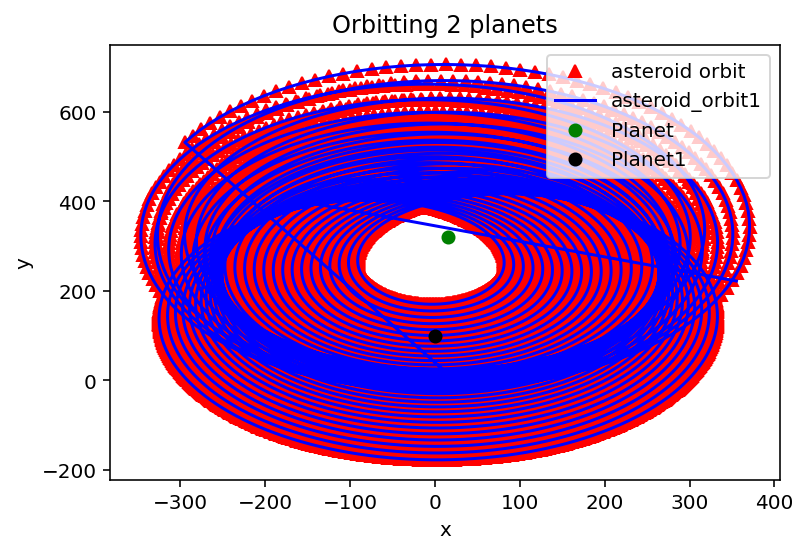

In [10]:
plt.plot(asteroid_xcoords,asteroid_ycoords,'r^', label = 'asteroid orbit')
plt.plot(asteroid_xcoord,asteroid_ycoord, 'b-', label = 'asteroid_orbit1')

plt.plot(15,320,'go',label = 'Planet')
plt.plot(0,100,'ko',label = 'Planet1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Orbitting 2 planets')